In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from tree import Tree
import tree_to_prism as tp

In [2]:
file = 'tree/experiment.xml'
tree = Tree()
tree = tp.parse_file(file)
tree.root.to_string()

'Label: root\nRefinement: disjunctive\nType: Goal\nAction: \nCost: \nRole: Attacker'

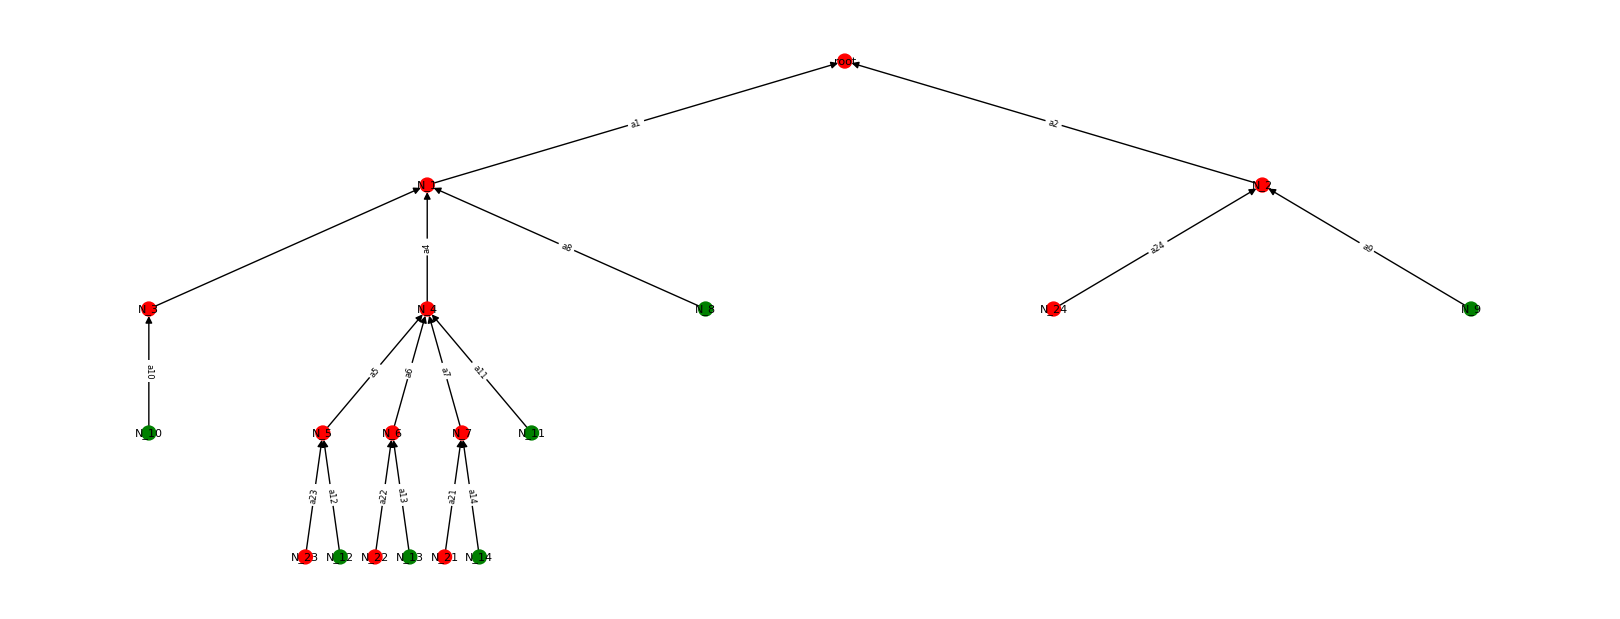

In [3]:
G = tree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = tree.hierarchy_pos(G, tree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    colors.append(G.nodes[node]['color']) 
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [4]:
subtree = tree.prune("N_4")

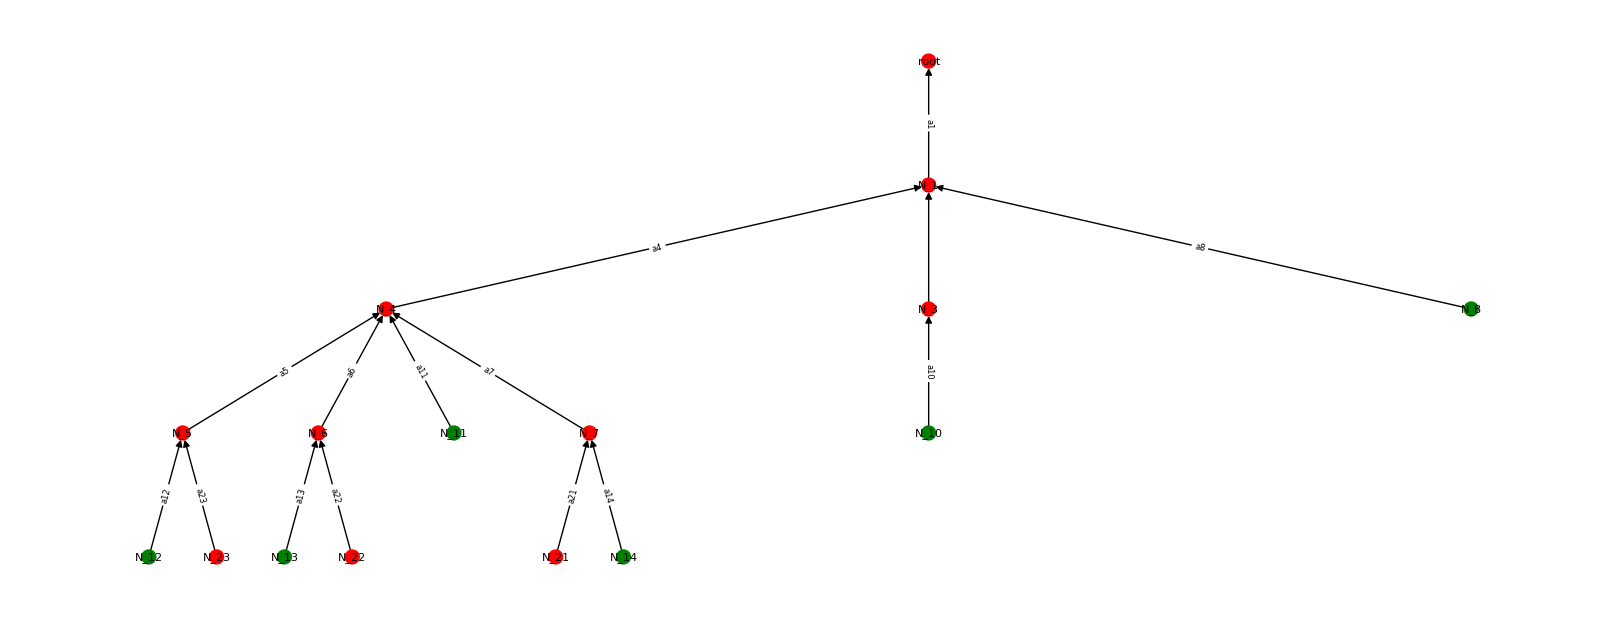

In [5]:
G = subtree.to_graph()

fig = plt.figure(figsize=(16, 6))
pos = subtree.hierarchy_pos(G, subtree.root.label, width=500, xcenter=0.5) # get the position of the nodes

colors = []
for node in G.nodes: 
    try:
        colors.append(G.nodes[node]['color']) 
    except:
        print(node)
    
nx.draw(nx.reverse(G), pos, node_color=colors, with_labels=True, arrows=True, node_size=100, font_size=8)
edge_labels = nx.get_edge_attributes(G, 'action') # get the edge labels
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6) 

plt.show()

In [8]:
string = tp.get_prism_model(subtree) # get the prism model as a string
string

root


'smg\n\nplayer attacker\n\tattacker,\n\t[a1], [a4], [a5], [a6], [a7], [a23], [a22], [a21]\nendplayer\nplayer defender\n\tdefender,\n\t[a8], [a11], [a10], [a12], [a13], [a14]\nendplayer\n\nglobal sched : [1..2];\n\nglobal root : bool;\nlabel "terminate" = root=true;\n\nglobal N_1 : bool;\nglobal N_5 : bool;\nglobal N_6 : bool;\nglobal N_7 : bool;\nglobal N_4 : bool;\nglobal N_3 : bool init true;\n\nmodule attacker\n\n\ta5 : bool;\n\ta4 : bool;\n\ta23 : bool;\n\ta7 : bool;\n\ta1 : bool;\n\ta21 : bool;\n\ta6 : bool;\n\ta22 : bool;\n\n\t[a1] sched=1 & !root & !root & !a1 & (N_1) -> (root\'=true) & (a1\'=true) & (sched\'=2);\n\t[a4] sched=1 & !root & !N_1 & !a4 & (N_4 & N_3) -> (N_1\'=true) & (a4\'=true) & (sched\'=2);\n\t[a5] sched=1 & !root & !N_4 & !a5 & (N_5) -> (N_4\'=true) & (a5\'=true) & (sched\'=2);\n\t[a6] sched=1 & !root & !N_4 & !a6 & (N_6) -> (N_4\'=true) & (a6\'=true) & (sched\'=2);\n\t[a7] sched=1 & !root & !N_4 & !a7 & (N_7) -> (N_4\'=true) & (a7\'=true) & (sched\'=2);\n\t[a2

In [9]:
tp.save_prism_model(string, 'experiment.prism')  # save the model to a file and create the properties file